In [2]:
%matplotlib inline
import numpy as np
import mne
import matplotlib.pyplot as plt
# import matplotlib
# matplotlib.use("Qt5Agg") # for interactive plots

In [3]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = sample_data_folder / "MEG" / "sample" / "sample_audvis_raw.fif"
raw = mne.io.read_raw_fif(sample_data_raw_file, verbose=False).crop(tmax=60)

In [4]:
eeg = raw.copy().pick(picks=["eeg"])

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>


In [5]:
events = mne.find_events(raw, stim_channel="STI 014")
epochs = mne.Epochs(eeg, events, tmin=-0.3, tmax=0.7)

86 events found
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
86 matching events found
Setting baseline interval to [-0.2996928197375818, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


In [21]:
len(epochs.events)

86

In [6]:
epochs.average() # need epoched data



<Evoked | '0.23 × 1 + 0.23 × 2 + 0.23 × 3 + 0.21 × 4 + 0.05 × 5 + 0.05 × 32' (average, N=85), -0.29969 – 0.69928 sec, baseline -0.299693 – 0 sec, 60 ch, ~3.2 MB>

In [23]:
print(len(epochs.get_channel_types()))
epochs.get_channel_types()

60


['eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg']

In [24]:
epochs.average()

<Evoked | '0.23 × 1 + 0.23 × 2 + 0.23 × 3 + 0.21 × 4 + 0.05 × 5 + 0.05 × 32' (average, N=85), -0.29969 – 0.69928 sec, baseline -0.299693 – 0 sec, 60 ch, ~3.2 MB>

In [7]:
print(epochs.get_data().shape)
epochs.get_data()

Loading data for 86 events and 601 original time points ...
1 bad epochs dropped
(85, 60, 601)
Loading data for 85 events and 601 original time points ...


array([[[-8.31165980e-06, -9.36482144e-06, -7.56825159e-06, ...,
          8.04332093e-06,  1.41764387e-05,  1.32471784e-05],
        [-6.84768073e-06, -9.78499756e-06, -1.25460754e-05, ...,
          1.13049373e-05,  1.46534785e-05,  1.23623714e-05],
        [-9.46832088e-06, -1.04336529e-05, -1.12783185e-05, ...,
          1.28549831e-05,  1.48459805e-05,  1.26136501e-05],
        ...,
        [ 7.53232831e-07, -1.87188921e-06, -5.12475782e-06, ...,
         -1.64361773e-06,  2.39621997e-07, -4.43994338e-06],
        [-3.57322901e-07, -3.41671009e-06, -7.39391343e-06, ...,
          7.44056486e-07,  2.51850106e-06, -2.56008168e-06],
        [-6.35758386e-07, -3.44239907e-06, -7.65236009e-06, ...,
         -1.09513259e-07,  2.34629734e-06, -2.44838049e-06]],

       [[-5.64606902e-06, -4.65485807e-06, -7.51964939e-07, ...,
         -2.15673950e-05, -2.02664306e-05, -2.06381347e-05],
        [-4.42609831e-06, -1.37128880e-06, -7.25079095e-07, ...,
         -7.30466880e-06, -4.95481534e

In [26]:
# Iterate
for i in range(len(epochs)):
    print(f"Epoch {i}:")
    print(f"  Data shape: {epochs[i].get_data().shape}")
    print(f"  Channel types: {epochs[i].get_channel_types()}")
    print(f"  Montage: {epochs[i].get_montage()}")
    print()

Epoch 0:
Loading data for 1 events and 601 original time points ...
  Data shape: (1, 60, 601)
  Channel types: ['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg']
  Montage: <DigMontage | 78 extras (headshape), 4 HPIs, 3 fiducials, 60 channels>

Epoch 1:
Loading data for 1 events and 601 original time points ...
  Data shape: (1, 60, 601)
  Channel types: ['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg'

In [27]:
epochs.plot()  # Default is to show only the first 20 epochs and 20 channels
plt.show()

Using qt as 2D backend.
Loading data for 20 events and 601 original time points ...
Loading data for 8 events and 601 original time points ...


2025-05-12 18:20:25.435 python[15988:283541] +[IMKClient subclass]: chose IMKClient_Modern
2025-05-12 18:20:25.435 python[15988:283541] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [28]:
# Print the annotations
print(epochs.annotations)

# Print the first 10 samples of the data
print(epochs)

<Annotations | 0 segments>
<Epochs |  85 events (all good), -0.299693 - 0.699283 sec, baseline -0.299693 – 0 sec, ~2.9 MB, data not loaded,
 '1': 20
 '2': 20
 '3': 19
 '4': 18
 '5': 4
 '32': 4>


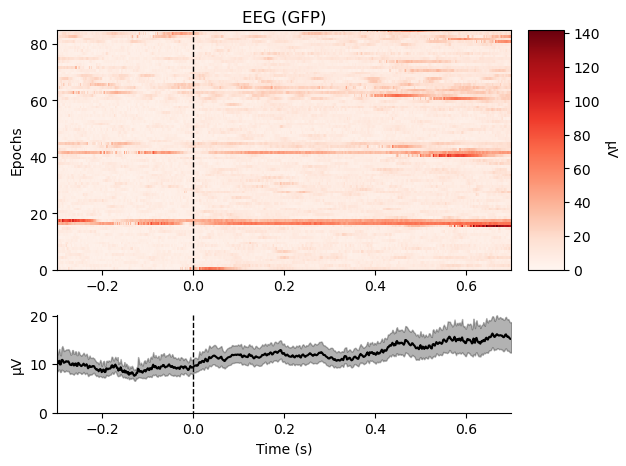

[<Figure size 640x480 with 3 Axes>]

In [29]:
epochs.plot_image()

In [8]:
epochs.ch_names

['EEG 001',
 'EEG 002',
 'EEG 003',
 'EEG 004',
 'EEG 005',
 'EEG 006',
 'EEG 007',
 'EEG 008',
 'EEG 009',
 'EEG 010',
 'EEG 011',
 'EEG 012',
 'EEG 013',
 'EEG 014',
 'EEG 015',
 'EEG 016',
 'EEG 017',
 'EEG 018',
 'EEG 019',
 'EEG 020',
 'EEG 021',
 'EEG 022',
 'EEG 023',
 'EEG 024',
 'EEG 025',
 'EEG 026',
 'EEG 027',
 'EEG 028',
 'EEG 029',
 'EEG 030',
 'EEG 031',
 'EEG 032',
 'EEG 033',
 'EEG 034',
 'EEG 035',
 'EEG 036',
 'EEG 037',
 'EEG 038',
 'EEG 039',
 'EEG 040',
 'EEG 041',
 'EEG 042',
 'EEG 043',
 'EEG 044',
 'EEG 045',
 'EEG 046',
 'EEG 047',
 'EEG 048',
 'EEG 049',
 'EEG 050',
 'EEG 051',
 'EEG 052',
 'EEG 053',
 'EEG 054',
 'EEG 055',
 'EEG 056',
 'EEG 057',
 'EEG 058',
 'EEG 059',
 'EEG 060']

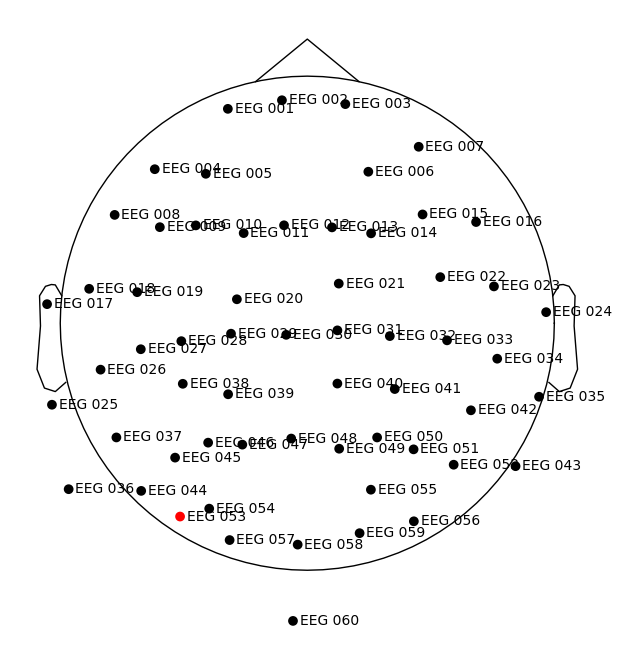

In [30]:
epochs.plot_sensors(kind='topomap', ch_type='eeg', show_names=True)
plt.show()

/opt/anaconda3/envs/deepEEG/lib/python3.12/site-packages/mne/viz/utils.py:137: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


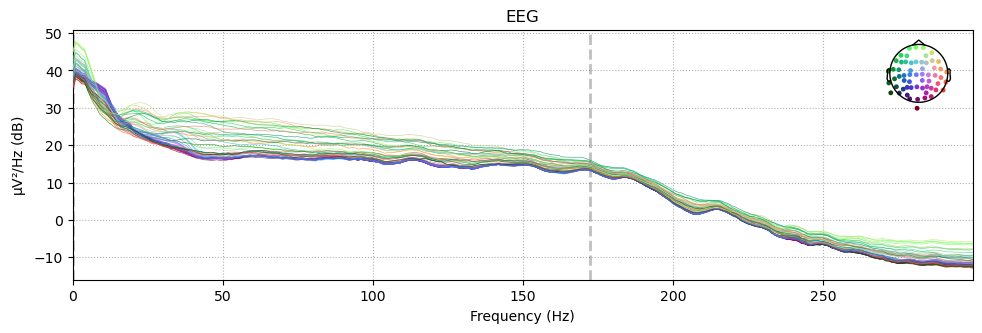

In [31]:
epochs.plot_psd()
plt.show()

In [32]:
df = epochs.to_data_frame()
df

,time,condition,epoch,EEG 001,EEG 002,EEG 003,EEG 004,EEG 005,EEG 006,EEG 007,...,EEG 051,EEG 052,EEG 053,EEG 054,EEG 055,EEG 056,EEG 057,EEG 058,EEG 059,EEG 060
0,-0.299693,2,0,-8.311660,-6.847681,-9.468321,1.838086,-2.535419,-8.797985,-6.942615,...,0.593644,0.106806,1.873406,0.993330,1.328203,1.081930,0.442982,0.753233,-0.357323,-0.635758
1,-0.298028,2,0,-9.364821,-9.784998,-10.433653,-2.723315,-6.357684,-12.846447,-10.319263,...,-1.950911,-2.409399,0.875359,-1.856829,-0.975996,-1.482218,-2.347362,-1.871889,-3.416710,-3.442399
2,-0.296363,2,0,-7.568252,-12.546075,-11.278318,-4.975146,-10.478565,-15.203014,-17.197620,...,-5.189437,-5.355200,0.625847,-5.114153,-3.989180,-5.238993,-5.422436,-5.124758,-7.393913,-7.652360
3,-0.294698,2,0,-6.638991,-14.073480,-12.846983,-4.917407,-10.478565,-14.417492,-24.326099,...,-5.999068,-5.907538,2.621941,-5.753985,-4.698164,-6.193094,-5.991894,-5.752504,-7.822228,-8.061662
4,-0.293033,2,0,-3.913161,-10.959924,-10.071653,-0.471484,-5.760455,-9.462658,-23.075489,...,-2.066573,-1.918432,1.811028,-1.856829,-1.212324,-1.720743,-2.233471,-1.472414,-3.049584,-3.091569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51080,0.692623,2,84,-1.068906,2.067482,-1.273665,-2.249279,0.347119,-10.731912,3.262642,...,-16.442482,-11.317327,-6.263296,10.301898,-12.475449,-13.218392,8.769024,2.679352,-1.643618,6.609561
51081,0.694288,2,84,-5.653257,0.892555,-4.893660,-2.480236,1.481854,-12.846780,8.577736,...,-17.309944,-11.378698,-4.329580,10.301898,-13.243515,-13.397286,8.484295,2.222809,-2.439058,6.843448
51082,0.695953,2,84,-2.555722,1.891243,-3.747328,3.409168,1.661023,-9.946390,11.078957,...,-15.632850,-9.660314,-4.329580,12.221393,-11.648300,-10.952401,10.591289,4.106049,-0.481051,9.357730
51083,0.697618,2,84,6.612979,1.303779,-0.127333,8.836658,1.004071,-10.550638,7.077004,...,-14.881050,-9.046606,-5.202871,12.395892,-11.057480,-9.342354,10.420452,4.277253,-0.052736,9.533145


In [33]:
# Print dataframe sizes and statistics
print("DataFrame shape:", df.shape)
print("DataFrame columns:", df.columns)
print("DataFrame info:")
print(df.info())
print("DataFrame description:")
print(df.describe())
# Print the first 5 rows of the DataFrame
print("First 5 rows of DataFrame:")
print(df.head())

DataFrame shape: (51085, 63)
DataFrame columns: Index(['time', 'condition', 'epoch', 'EEG 001', 'EEG 002', 'EEG 003',
       'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 008', 'EEG 009',
       'EEG 010', 'EEG 011', 'EEG 012', 'EEG 013', 'EEG 014', 'EEG 015',
       'EEG 016', 'EEG 017', 'EEG 018', 'EEG 019', 'EEG 020', 'EEG 021',
       'EEG 022', 'EEG 023', 'EEG 024', 'EEG 025', 'EEG 026', 'EEG 027',
       'EEG 028', 'EEG 029', 'EEG 030', 'EEG 031', 'EEG 032', 'EEG 033',
       'EEG 034', 'EEG 035', 'EEG 036', 'EEG 037', 'EEG 038', 'EEG 039',
       'EEG 040', 'EEG 041', 'EEG 042', 'EEG 043', 'EEG 044', 'EEG 045',
       'EEG 046', 'EEG 047', 'EEG 048', 'EEG 049', 'EEG 050', 'EEG 051',
       'EEG 052', 'EEG 053', 'EEG 054', 'EEG 055', 'EEG 056', 'EEG 057',
       'EEG 058', 'EEG 059', 'EEG 060'],
      dtype='object')
DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51085 entries, 0 to 51084
Data columns (total 63 columns):
 #   Column     Non-Null Count  Dtype

In [34]:
# Print unique values of time, condition, and epoch columns
print("Unique values in 'time' column:", df['time'].unique())
print("Unique values in 'condition' column:", df['condition'].unique())
print("Unique values in 'epoch' column:", df['epoch'].unique())

Unique values in 'time' column: [-0.29969282 -0.29802786 -0.2963629  -0.29469794 -0.29303298 -0.29136802
 -0.28970306 -0.2880381  -0.28637314 -0.28470818 -0.28304322 -0.28137826
 -0.2797133  -0.27804834 -0.27638338 -0.27471842 -0.27305346 -0.2713885
 -0.26972354 -0.26805858 -0.26639362 -0.26472866 -0.2630637  -0.26139874
 -0.25973378 -0.25806882 -0.25640386 -0.2547389  -0.25307394 -0.25140898
 -0.24974402 -0.24807906 -0.2464141  -0.24474914 -0.24308418 -0.24141922
 -0.23975426 -0.2380893  -0.23642434 -0.23475938 -0.23309442 -0.23142946
 -0.2297645  -0.22809954 -0.22643457 -0.22476961 -0.22310465 -0.22143969
 -0.21977473 -0.21810977 -0.21644481 -0.21477985 -0.21311489 -0.21144993
 -0.20978497 -0.20812001 -0.20645505 -0.20479009 -0.20312513 -0.20146017
 -0.19979521 -0.19813025 -0.19646529 -0.19480033 -0.19313537 -0.19147041
 -0.18980545 -0.18814049 -0.18647553 -0.18481057 -0.18314561 -0.18148065
 -0.17981569 -0.17815073 -0.17648577 -0.17482081 -0.17315585 -0.17149089
 -0.16982593 -0.1681

In [ ]:
import mne

# Load the EDF file
raw = mne.io.read_raw_edf('sub-NORB00001_ses-1_task-EEG_eeg.edf', preload=False)

# Print the channel names
print(raw.ch_names)



Extracting EDF parameters from /Users/cccohen/deepEEG/DataExploration/sub-NORB00001_ses-1_task-EEG_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'FZ', 'CZ', 'PZ', 'Pg1', 'Pg2']


In [3]:
pip install --upgrade mne


Note: you may need to restart the kernel to use updated packages.


Extracting parameters from /Users/cccohen/deepEEG/Khula/1_191_14933186_12_T_20230720_011457002_processed.set...
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Ready.


/var/folders/xx/mmyr9_kx7js9mtx2ptls0vyh0000gn/T/ipykernel_46151/1030375239.py:4: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  raw = mne.io.read_epochs_eeglab('/Users/cccohen/deepEEG/Khula/1_191_14933186_12_T_20230720_011457002_processed.set')


['E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E9', 'E10', 'E11', 'E12', 'E13', 'E15', 'E16', 'E18', 'E19', 'E20', 'E22', 'E23', 'E24', 'E26', 'E27', 'E28', 'E29', 'E30', 'E31', 'E33', 'E34', 'E35', 'E36', 'E37', 'E39', 'E40', 'E41', 'E42', 'E45', 'E46', 'E47', 'E50', 'E51', 'E52', 'E53', 'E54', 'E55', 'E57', 'E58', 'E59', 'E60', 'E61', 'E62', 'E63', 'E64', 'E65', 'E66', 'E67', 'E69', 'E70', 'E71', 'E72', 'E74', 'E75', 'E76', 'E77', 'E78', 'E79', 'E80', 'E82', 'E83', 'E84', 'E85', 'E86', 'E87', 'E89', 'E90', 'E91', 'E92', 'E93', 'E95', 'E96', 'E97', 'E98', 'E100', 'E101', 'E102', 'E103', 'E104', 'E105', 'E106', 'E108', 'E109', 'E110', 'E111', 'E112', 'E115', 'E116', 'E117', 'E118', 'E122', 'E123', 'E124']
Annotations: None
E2: [0.05334   0.0794136 0.002371 ]
E3: [0.04257   0.0861151 0.0277296]
E4: [0.0268245 0.0804222 0.0531354]
E5: [0.0163804 0.0633091 0.0700984]
E6: [0.        0.0389585 0.0814682]
E7: [-0.0141305  0.0174142  0.0845875]
E9: [0.033556   0.0982549  0.00750687]
E10: [0.0239622 0.

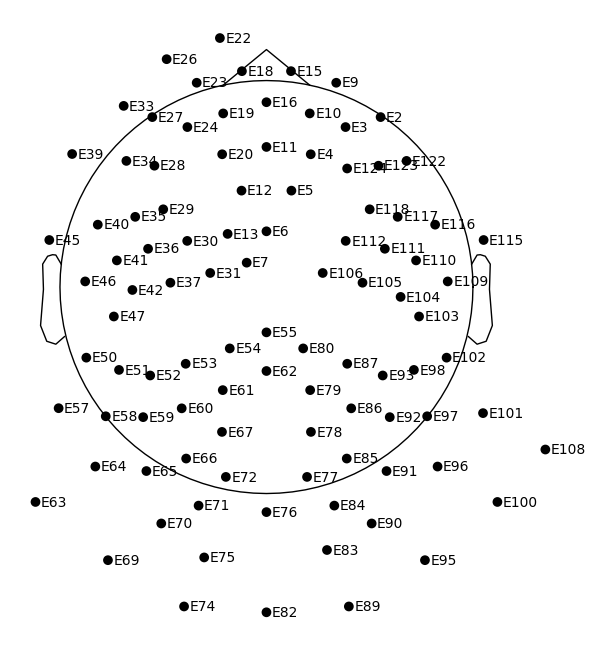

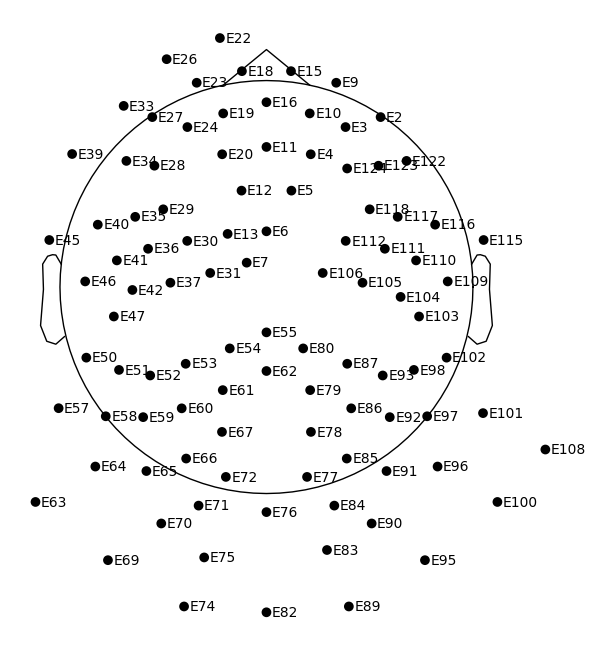

In [26]:
from mne.io import read_raw_eeglab

# Load the EDF file
raw = mne.io.read_epochs_eeglab('/Users/cccohen/deepEEG/Khula/1_191_14933186_12_T_20230720_011457002_processed.set')

# Print the channel names
print(raw.ch_names)

print("Annotations:", raw.annotations)

montage = raw.get_montage() 

for ch_name, loc in zip(raw.ch_names, montage.get_positions()['ch_pos'].values()):
    print(f"{ch_name}: {loc}")

raw.plot_sensors(kind='topomap', show_names=True)

Fp1: [-0.0294367  0.0839171 -0.00699  ]
Fpz: [ 0.0001123  0.088247  -0.001713 ]
Fp2: [ 0.0298723  0.0848959 -0.00708  ]
AF9: [-0.0489708  0.0640872 -0.047683 ]
AF7: [-0.0548397  0.0685722 -0.01059  ]
AF5: [-0.0454307  0.0728622  0.005978 ]
AF3: [-0.0337007  0.0768371  0.021227 ]
AF1: [-0.0184717  0.0799041  0.032752 ]
AFz: [0.0002313 0.080771  0.035417 ]
AF2: [0.0198203 0.0803019 0.032764 ]
AF4: [0.0357123 0.0777259 0.021956 ]
AF6: [0.0465843 0.0738078 0.006034 ]
AF8: [ 0.0557433  0.0696568 -0.010755 ]
AF10: [ 0.0504352  0.0638698 -0.048005 ]
F9: [-0.0701019  0.0416523 -0.049952 ]
F7: [-0.0702629  0.0424743 -0.01142  ]
F5: [-0.0644658  0.0480353  0.016921 ]
F3: [-0.0502438  0.0531112  0.042192 ]
F1: [-0.0274958  0.0569311  0.060342 ]
Fz: [0.0003122 0.058512  0.066462 ]
F2: [0.0295142 0.0576019 0.05954  ]
F4: [0.0518362 0.0543048 0.040814 ]
F6: [0.0679142 0.0498297 0.016367 ]
F8: [ 0.0730431  0.0444217 -0.012    ]
F10: [ 0.0721141  0.0420667 -0.050452 ]
FT9: [-0.0840759  0.0145673 -0.05

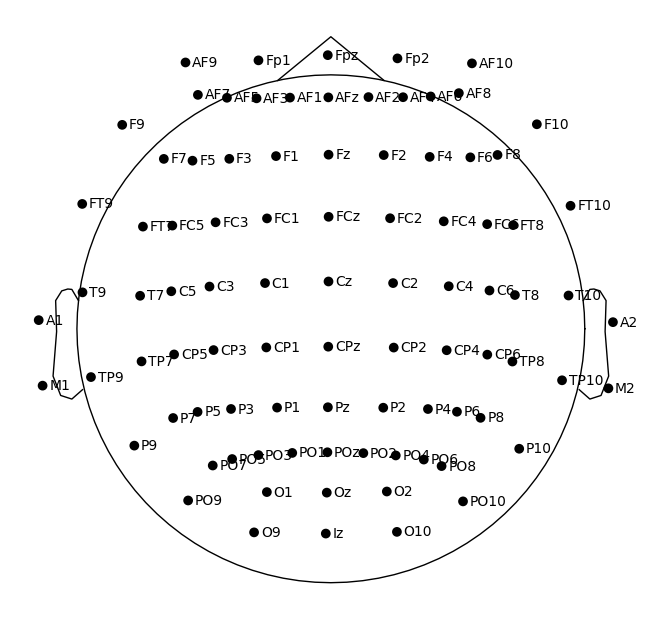

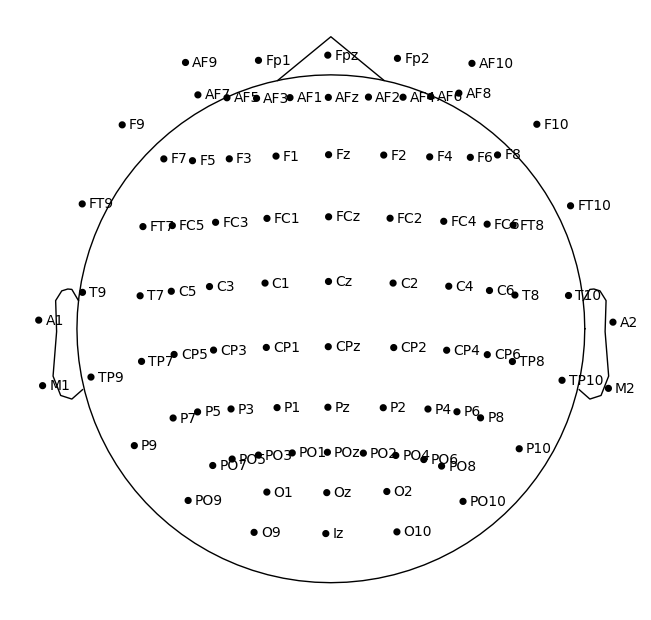

In [31]:
import mne

# Load a standard 10-20 montage
montage = mne.channels.make_standard_montage('standard_1020')

# Get channel names and positions
for ch_name, loc in montage.get_positions()['ch_pos'].items():
    print(f"{ch_name}: {loc}")
    
    
    
montage.plot(show_names=True)

In [10]:
raw.rename_channels({ch: f'EEG {ch.upper()}-REF' for ch in raw.ch_names})


<EpochsEEGLAB | 29 events (all good), 0 – 1.999 s (baseline off), ~43.9 MiB, data loaded,
 'X/bgin/bsl+/X': 1
 'X/X': 28>

In [22]:
from mne.io import read_epochs_eeglab

epochs = read_epochs_eeglab("/Users/cccohen/deepEEG/Khula/1_191_14933186_12_T_20230720_011457002_processed.set", verbose=True)

# Show event codes
print(epochs.events)
print(epochs.event_id)

Extracting parameters from /Users/cccohen/deepEEG/Khula/1_191_14933186_12_T_20230720_011457002_processed.set...


/var/folders/xx/mmyr9_kx7js9mtx2ptls0vyh0000gn/T/ipykernel_46151/2913311494.py:3: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = read_epochs_eeglab("/Users/cccohen/deepEEG/Khula/1_191_14933186_12_T_20230720_011457002_processed.set", verbose=True)


Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Ready.
[[    1     0     1]
 [ 2001     0     2]
 [ 4001     0     2]
 [ 6001     0     2]
 [ 8001     0     2]
 [10001     0     2]
 [12001     0     2]
 [14001     0     2]
 [16001     0     2]
 [18001     0     2]
 [20001     0     2]
 [22001     0     2]
 [24001     0     2]
 [26001     0     2]
 [28001     0     2]
 [30001     0     2]
 [32001     0     2]
 [34001     0     2]
 [36001     0     2]
 [38001     0     2]
 [40001     0     2]
 [42001     0     2]
 [44001     0     2]
 [46001     0     2]
 [48001     0     2]
 [50001     0     2]
 [52001     0     2]
 [54001     0     2]
 [56001     0     2]]
{'X/bgin/bsl+/X': 1, 'X/X': 2}


In [3]:
import torch

# Load the checkpoint
ckpt_path = "/Users/cccohen/deepEEG/DataExploration/checkpoint-best.pth"
checkpoint = torch.load(ckpt_path, map_location='cpu', weights_only=False)
print(checkpoint.keys())


dict_keys(['model', 'optimizer', 'epoch', 'args', 'scaler'])


In [4]:
model_state_dict = checkpoint['model']
print(model_state_dict.keys())

odict_keys(['chan_conv.0.weight', 'chan_conv.0.bias', 'chan_conv.1.weight', 'chan_conv.1.bias', 'chan_conv.1.running_mean', 'chan_conv.1.running_var', 'chan_conv.1.num_batches_tracked', 'chan_conv.3.weight', 'chan_conv.3.bias', 'chan_conv.4.weight', 'chan_conv.4.bias', 'chan_conv.4.running_mean', 'chan_conv.4.running_var', 'chan_conv.4.num_batches_tracked', 'target_encoder.summary_token', 'target_encoder.patch_embed.proj.weight', 'target_encoder.patch_embed.proj.bias', 'target_encoder.chan_embed.weight', 'target_encoder.blocks.0.norm1.weight', 'target_encoder.blocks.0.norm1.bias', 'target_encoder.blocks.0.attn.qkv.weight', 'target_encoder.blocks.0.attn.qkv.bias', 'target_encoder.blocks.0.attn.proj.weight', 'target_encoder.blocks.0.attn.proj.bias', 'target_encoder.blocks.0.norm2.weight', 'target_encoder.blocks.0.norm2.bias', 'target_encoder.blocks.0.mlp.fc1.weight', 'target_encoder.blocks.0.mlp.fc1.bias', 'target_encoder.blocks.0.mlp.fc2.weight', 'target_encoder.blocks.0.mlp.fc2.bias', 

In [ ]:
print(model_state_dict['chan_conv.0.weight'].shape)
# output means: 20 output channels, 19 input channels, a 1×1 kernel (spatial dimensions)

torch.Size([20, 19, 1, 1])


In [ ]:
raw = mne.io.read_epochs_eeglab("/Users/cccohen/deepEEG/Khula/1_191_14933186_12_T_20230720_011457002_processed.set")
print(f"Sampling frequency: {data.info['sfreq']} Hz")

In [47]:
import mne
import numpy as np
from scipy.spatial.distance import cdist

raw = mne.io.read_epochs_eeglab("/Users/cccohen/deepEEG/Khula/1_191_14933186_12_T_20230720_011457002_processed.set")
montage = mne.channels.make_standard_montage('GSN-HydroCel-128')
raw.set_montage(montage, 'cm')
            
for ch in raw.info['chs']:
                print(ch['ch_name'], ch['loc'][:3])

# Load EGI and 10-20 montages
egi_montage = mne.channels.make_standard_montage('GSN-HydroCel-128')
std1020_montage = mne.channels.make_standard_montage('standard_1020')

# Get channel positions
egi_pos = egi_montage.get_positions()['ch_pos']
std_pos = std1020_montage.get_positions()['ch_pos']


# Convert to arrays and label lists
egi_labels, egi_xyz = zip(*[(k, v) for k, v in egi_pos.items() if k.startswith('E')])
std_labels, std_xyz = zip(*std_pos.items())

# Compute distance matrix
distances = cdist(np.array(egi_xyz), np.array(std_xyz))

# Find closest 10-20 match for each EGI channel
nearest_matches = {}
for i, label in enumerate(egi_labels):
    closest_idx = np.argmin(distances[i])
    closest_label = "EEG " + std_labels[closest_idx] + "-REF"
    nearest_matches[f"EEG {label}-REF"] = closest_label

print(nearest_matches)

Extracting parameters from /Users/cccohen/deepEEG/Khula/1_191_14933186_12_T_20230720_011457002_processed.set...
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Ready.
E2 [0.05729458 0.07563959 0.0312517 ]
E3 [0.04183701 0.08854471 0.06000893]
E4 [0.03106102 0.08532577 0.08123536]
E5 [0.01601688 0.07154467 0.10243338]
E6 [0.         0.05243744 0.11605322]
E7 [-0.01325013  0.02880136  0.12436175]
E9 [0.02918326 0.09991306 0.03735032]
E10 [0.01982304 0.10025007 0.06015118]
E11 [0.         0.09418666 0.08096039]
E12 [-0.01601688  0.07154467  0.10243338]
E13 [-0.02637327  0.04618422  0.1135968 ]
E15 [0.         0.10235695 0.03977492]
E16 [0.         0.10412449 0.05888022]
E18 [-0.01982304  0.10025007  0.06015118]
E19 [-0.03106102  0.08532577  0.08123536]
E20 [-0.04142206  0.06453158  0.09366024]
E22 [-0.02918326  0.09991306  0.03735032]
E23 [-0.04183701  0.08854471  0.06000893]
E24 [-0.04828197  0.07254497  0.07570591]
E26 [-0.057294

/var/folders/xx/mmyr9_kx7js9mtx2ptls0vyh0000gn/T/ipykernel_46151/3318922395.py:5: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  raw = mne.io.read_epochs_eeglab("/Users/cccohen/deepEEG/Khula/1_191_14933186_12_T_20230720_011457002_processed.set")


In [34]:
for egi_ch, std_ch in nearest_matches.items():
    print(f"{egi_ch} → {std_ch}")


E1 → AF8
E2 → AF6
E3 → AF4
E4 → F2
E5 → Fz
E6 → FCz
E7 → FCz
E8 → Fp2
E9 → Fp2
E10 → AF2
E11 → AFz
E12 → Fz
E13 → FC1
E14 → Fpz
E15 → Fpz
E16 → AFz
E17 → Fpz
E18 → AF1
E19 → F1
E20 → F1
E21 → Fpz
E22 → AF3
E23 → AF3
E24 → F3
E25 → Fp1
E26 → AF5
E27 → F3
E28 → F3
E29 → FC3
E30 → FC1
E31 → C1
E32 → AF7
E33 → F7
E34 → FC5
E35 → FC3
E36 → C3
E37 → C1
E38 → F9
E39 → FT7
E40 → C5
E41 → C3
E42 → C3
E43 → F9
E44 → FT9
E45 → T7
E46 → C5
E47 → CP5
E48 → F9
E49 → FT9
E50 → TP7
E51 → CP5
E52 → CP3
E53 → CP1
E54 → CP1
E55 → Cz
E56 → A1
E57 → TP9
E58 → P7
E59 → P5
E60 → P3
E61 → P1
E62 → Pz
E63 → M1
E64 → P9
E65 → PO7
E66 → PO3
E67 → P1
E68 → P9
E69 → PO9
E70 → O1
E71 → PO1
E72 → POz
E73 → PO9
E74 → O9
E75 → Oz
E76 → PO2
E77 → P2
E78 → P2
E79 → CP2
E80 → C2
E81 → Iz
E82 → O10
E83 → O2
E84 → PO4
E85 → P4
E86 → CP2
E87 → C2
E88 → PO10
E89 → PO10
E90 → PO8
E91 → P6
E92 → CP4
E93 → C4
E94 → P10
E95 → P10
E96 → P8
E97 → CP6
E98 → CP6
E99 → M2
E100 → TP10
E101 → TP8
E102 → C6
E103 → C4
E104 → C4
E105 → FC

In [35]:
egi_to_1020 = {
    'E1': 'Nz', 'E17': 'Fp1', 'E9': 'Fp2', 'E50': 'F7', 'E24': 'F3',
    'E4': 'Fz', 'E124': 'F4', 'E116': 'F8', 'E36': 'T7', 'E38': 'C3',
    'E79': 'Cz', 'E87': 'C4', 'E104': 'T8', 'E52': 'P7', 'E58': 'P3',
    'E62': 'Pz', 'E92': 'P4', 'E100': 'P8', 'E70': 'O1', 'E75': 'Oz',
    'E83': 'O2'
}

# Compare yours to computed
for egi_ch in egi_to_1020:
    print(f"{egi_ch}: expected {egi_to_1020[egi_ch]}, closest found {nearest_matches.get(egi_ch)}")


E1: expected Nz, closest found AF8
E17: expected Fp1, closest found Fpz
E9: expected Fp2, closest found Fp2
E50: expected F7, closest found TP7
E24: expected F3, closest found F3
E4: expected Fz, closest found F2
E124: expected F4, closest found F4
E116: expected F8, closest found FC6
E36: expected T7, closest found C3
E38: expected C3, closest found F9
E79: expected Cz, closest found CP2
E87: expected C4, closest found C2
E104: expected T8, closest found C4
E52: expected P7, closest found CP3
E58: expected P3, closest found P7
E62: expected Pz, closest found Pz
E92: expected P4, closest found CP4
E100: expected P8, closest found TP10
E70: expected O1, closest found O1
E75: expected Oz, closest found Oz
E83: expected O2, closest found O2
